# 4. 
Bonus! Joe thinks that maybe, just maybe, there might a signal in the measurements of another star. He's not sure.
What do you think? 

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
%pylab inline

filename='rv_4.dat'
df3 = pd.read_csv(filename,delim_whitespace=True)# error_bad_lines=False, skiprows=?
df3.head()

Populating the interactive namespace from numpy and matplotlib


,HD,RV,error
0,2.452987e+06,26.4097,0.0024
1,2.453337e+06,26.4133,0.0018
2,2.453368e+06,26.4080,0.0010
3,2.453372e+06,26.4146,0.0012
4,2.453373e+06,26.4150,0.0011


In [7]:
len(df3)

57

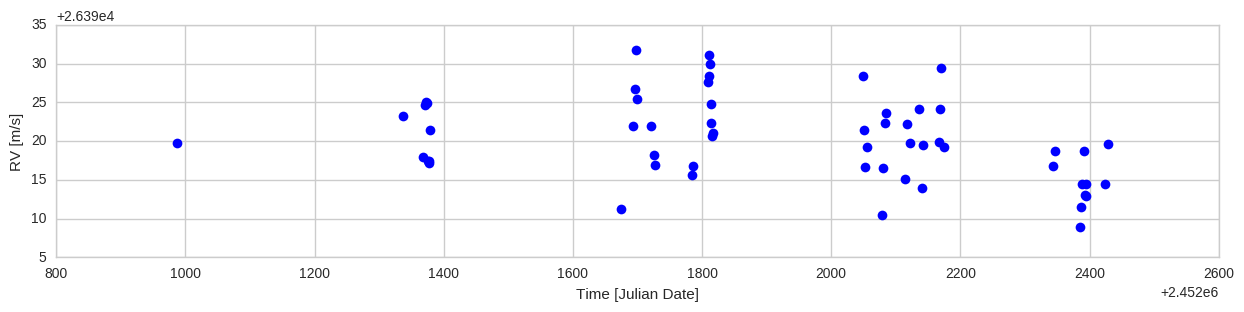

In [14]:
t3=df3.HD 
RV3=df3.RV*1000
err3=df3.error*1000

with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(1,1,figsize=(15,3))
    ax.plot(t3,RV3,'bo')  #all data
    #ax.plot(t3a,RV3a, 'bo') #color t2a and RV2a as blue
    ax.set_xlabel('Time [Julian Date]')
    ax.set_ylabel('RV [m/s]')

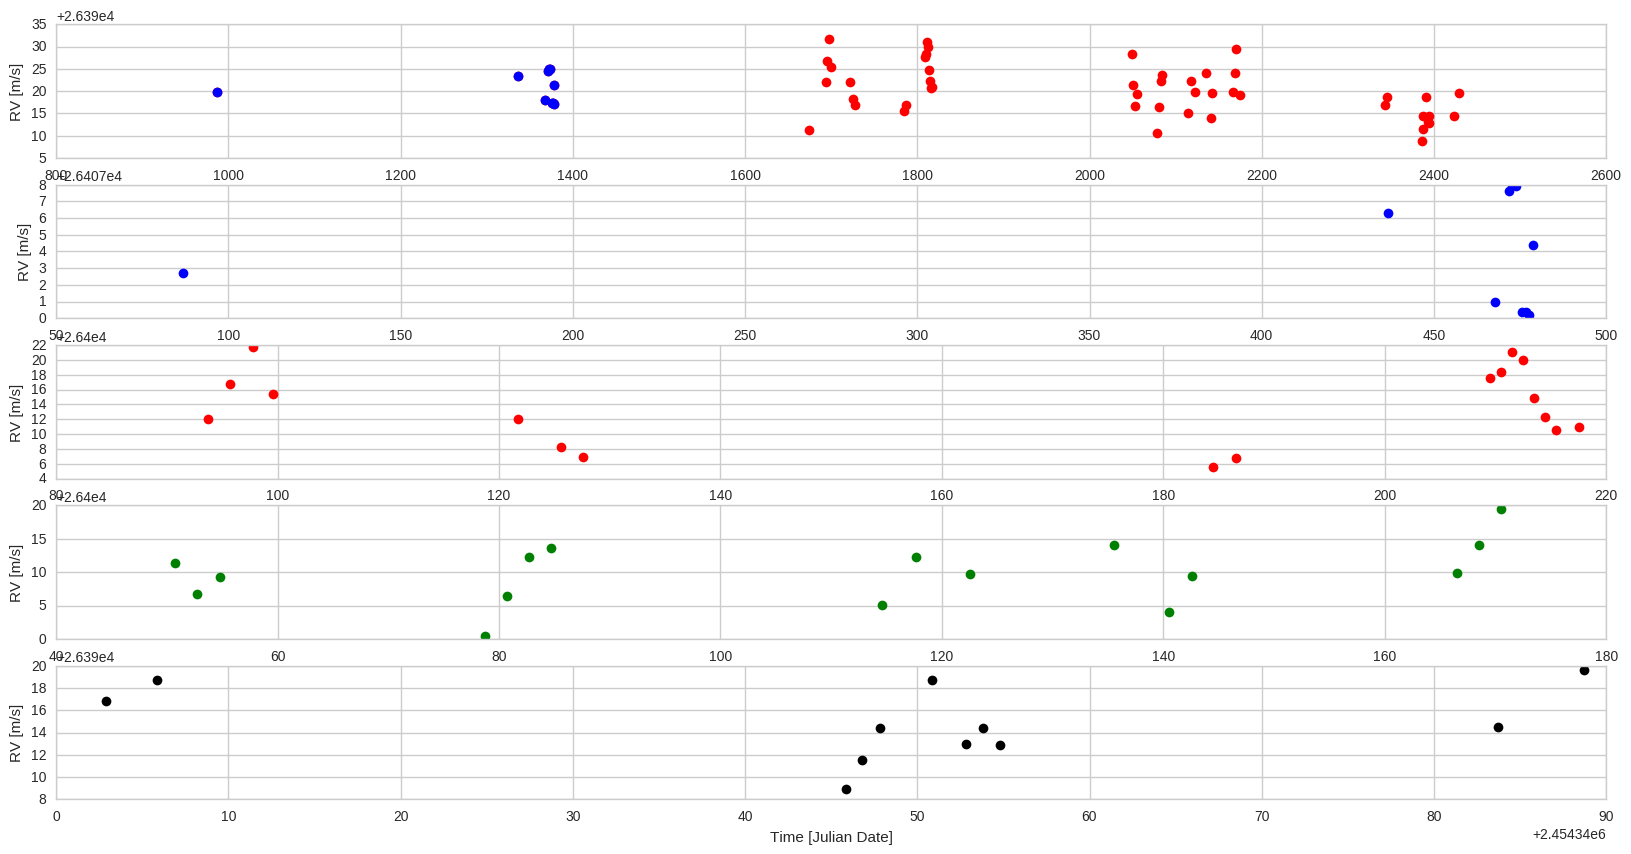

In [15]:
cutoff3a = 10
cutoff3b = 28
cutoff3c = 45

t3a, RV3a, err3a = t3[:cutoff3a],RV3[:cutoff3a], err3[:cutoff3a]
t3b, RV3b, err3b = t3[cutoff3a+1:cutoff3b],RV3[cutoff3a+1:cutoff3b], err3[cutoff3a+1:cutoff3b]
t3c, RV3c, err3c = t3[cutoff3b+1:cutoff3c],RV3[cutoff3b+1:cutoff3c], err3[cutoff3b+1:cutoff3c]
t3d, RV3d, err3d = t3[cutoff3c+1:],RV3[cutoff3c+1:], err3[cutoff3c+1:]

import seaborn as sb

with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(5,1,figsize=(20,10))
    ax[0].plot(t3,RV3,'ro')  #all data
    ax[0].plot(t3a,RV3a, 'bo') #color t2a and RV2a as blue
    #ax[0].set_xlabel('Time [Julian Date]')
    ax[0].set_ylabel('RV [m/s]')
    ax[1].plot(t3a,RV3a, 'bo') #Zoom the blue datapoints
    #ax[1].set_xlabel('Time [Julian Date]');
    ax[1].set_ylabel('RV [m/s]')
    ax[2].plot(t3b,RV3b,'ro')
    ax[2].set_xlabel('Time [Julian Date]')
    ax[2].set_ylabel('RV [m/s]')
    ax[3].plot(t3c,RV3c, 'go') #green
    ax[3].set_xlabel('Time [Julian Date]')
    ax[3].set_ylabel('RV [m/s]')
    ax[4].plot(t3d,RV3d, 'ko') #black
    ax[4].set_xlabel('Time [Julian Date]')
    ax[4].set_ylabel('RV [m/s]')    

/home/dl/miniconda2/envs/transit/lib/python3.5/site-packages/gatspy/periodic/lomb_scargle_fast.py:429: UserWarning: For smaller datasets, the approximation used by LombScargleFast may not be suitable.
It is recommended to use LombScargle instead.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("For smaller datasets, the approximation used by "


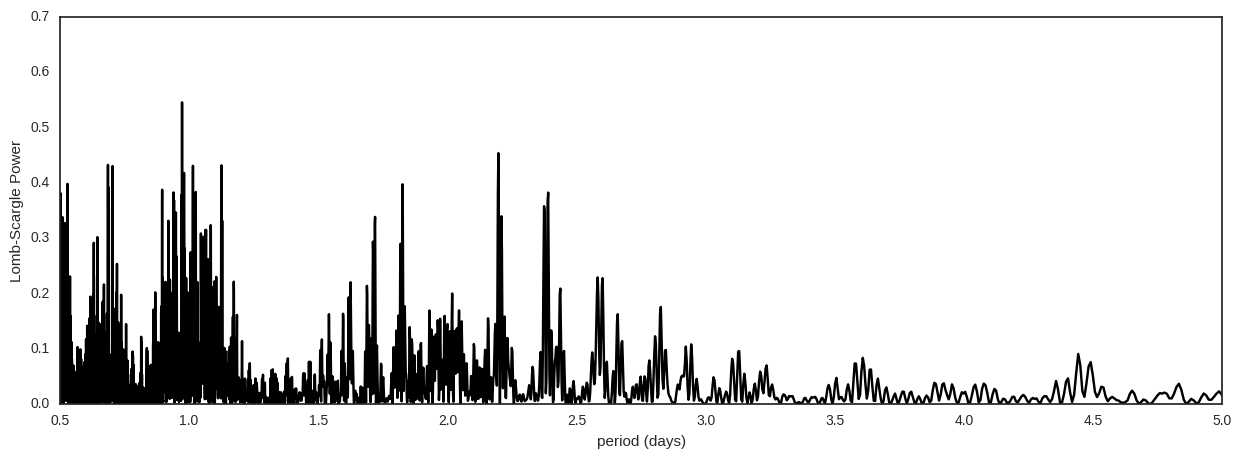

In [16]:
import gatspy
from gatspy.periodic import LombScargleFast
  
#RV2 /= np.median(df2.RV)                 #normalize

t3e, RV3e, err3e = t3[cutoff3a:cutoff3c],RV3[cutoff3a:cutoff3c], err3[cutoff3a:cutoff3c]
model = LombScargleFast().fit(t3e, RV3e)
periods, power = model.periodogram_auto(nyquist_factor=100)

idx1 = periods > 1
idx2 = np.argmax(power[idx1])
peak3 = periods[idx1][idx2]

with sb.axes_style('white'):
    fig, ax = plt.subplots(1,1,figsize=(15,5))
    ax.plot(periods, power, 'k-')
    ax.set(xlim=(0.5, 5),
       xlabel='period (days)',
       ylabel='Lomb-Scargle Power')
    ax.vlines(peak3, *ax.get_ylim(), linestyles='dotted', colors='r')

In [17]:
peak3

8.789216471631212

In [23]:
len(t3)

57

 final_simplex: (array([[  5.96059217e+04,   8.79910347e+00,  -3.99573718e-04,
         -4.06799339e-02],
       [  5.95919798e+04,   8.79910347e+00,  -3.99313443e-04,
         -4.06627420e-02],
       [  5.96334624e+04,   8.79910347e+00,  -4.00087827e-04,
         -4.07138954e-02],
       [  5.96627399e+04,   8.79910347e+00,  -4.00634370e-04,
         -4.07499986e-02],
       [  5.99134129e+04,   8.79910347e+00,  -4.05313931e-04,
         -4.10591103e-02]]), array([  2.35712028e+10,   2.35714921e+10,   2.35718710e+10,
         2.35722300e+10,   2.35727053e+10]))
           fun: 23571202823.710712
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 801
           nit: 428
        status: 1
       success: False
             x: array([  5.96059217e+04,   8.79910347e+00,  -3.99573718e-04,
        -4.06799339e-02])


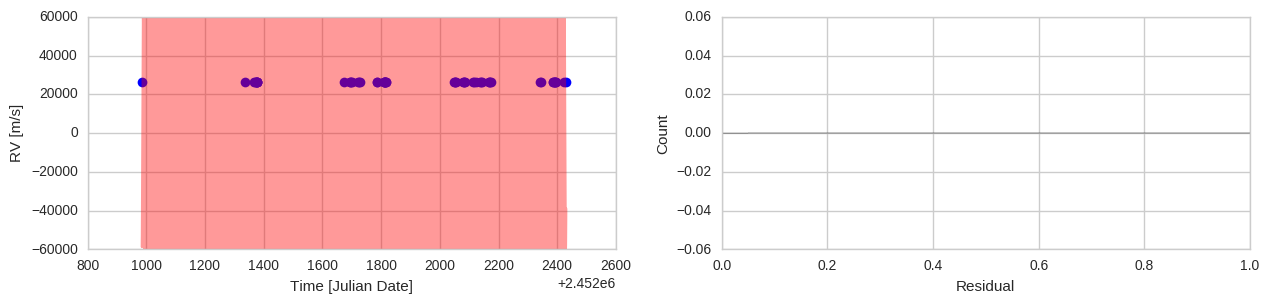

In [29]:
init_guess3 = [max(RV3)+5,peak3,0,0] #K,P,phi

optimize3 = opt.minimize(objective, init_guess3, args=(t3,RV3), method='nelder-mead')
print(optimize3)

new_guess = []

for i in optimize3.x:
    new_guess.append(i)

x3 = np.arange(t3[0]-1,t3[56]+1,0.01)

res3=[]
for i,j in zip(t3,RV3): 
    res.append(np.sum(simple_sin(new_guess, i)-j)**2)
             
with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(1,2,figsize=(15,3))
    ax[0].plot(t3,RV3,'bo')
    ax[0].plot(x3, simple_sin(new_guess, x3),'r-', lw=2, alpha=0.4)
    ax[0].set_xlabel('Time [Julian Date]')
    ax[0].set_ylabel('RV [m/s]')
    ax[1].hist(res3,bins=20)
    ax[1].set_xlabel('Residual')
    ax[1].set_ylabel('Count')

In [18]:
import scipy.optimize as opt
#opt.minimize?

K = max(RV3b)+5
def simple_sin(theta, x):
    K, P, phi, vsys = theta
    return K*np.sin(2*np.pi*(x-phi)/P)+vsys
    
def skewed(theta, x):
    K, P, phi, vsys = theta
    #return K*np.cos(2*np.pi*(x-phi)/P)+vsys
    return (K/np.pi)*np.arctan(1/np.tan((x-phi)/P))+vsys
    #return -K*np.cos((2*np.pi/P)+np.arcsin((x-phi)/P))+vsys

#skewed RV signal implies impulsive atmospheric motion
def objective(theta, xi, yi):
    model = skewed(theta, xi)
    return np.sum((model - yi)**2) #res**2

ValueError: not enough values to unpack (expected 4, got 0)

In [ ]:
print("The optimized period without the masked datapoints is {0:.3} days.".format(optimize3.x[1]))

In [31]:
G= 6.67E-11
M_sun= 1.989E30 # in kg
M_Jup = 1.898E27 # in kg
M_Earth = 5.972E24
M_star = M_sun
au = 1.496E11 #in meters

P=optimize3.x[1]
v_star=optimize3.x[0]

M_planet= 0

a = ((G*(M_star+M_planet)*(P*60*60*24)**2)/(4*np.pi**2))**(1/3)
print("Semi-major axis= {0:.3} m or {1:.3} AU".format(a, a/au))

v_planet = 2*np.pi*a/P
print("v_planet= {0:.3} m/s".format(v_planet))
M_planet=M_star*abs(v_star)/v_planet

print("M_planet= {0:.3} kg or {1:.3} M_Jup or or {2:.3} M_Earth".format(M_planet, M_planet/M_Jup, M_planet/M_Earth))

Semi-major axis= 1.25e+10 m or 0.0834 AU
v_planet= 8.91e+09 m/s
M_planet= 1.33e+25 kg or 0.00701 M_Jup or or 2.23 M_Earth
